# Understand problem statement

The objective of this task is to train a model that is able to differentiate from movies bad reviews to positive reviews. We are given a training sample of movies and labels, and we need to find a model that will predict better the labels on a new dataset. The labels are defined as sentiment in the data, where sentimet of 0 reflects a rating to a particular movie lower than 5 and 1 is a rating equal or higher to 7.

## Importing nltk library to work with NLP in Python

Nltk is a package of libraries and programs for performing symbolic and statistical Natural Language Processing for English. NLTK includes graphical demonstrations and sample data. Moreover, it is one of the most common libraries in the Natural Language Processing world for Python. However it is not the only one, other libraries that are well-known for NLP in Python are: **TextBlob**, **CoreNLP**, **Gensim** and **Spacy**.

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Importing libraries needed to import, plot and tokenize our data

What the code is doing in this cell, is first importing the data that we will be using to perform sentiment analysis. After importing it, we have to look at it in order to know which variables we have to take into account. This is performed by the head() method of python. 

In [2]:
import pandas as pd
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

train = pd.read_csv("labeledTrainData.tsv", 
                    header=0, delimiter="\t", 
                    quoting=3)

print(train.head())

         id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...


## Transform the data and tokenize it

After taking a look to our data, we can see that there are some punctuations, bars and quotes("") that need to be taken care of for our model. We will deal with them by means of regular expressions, but what are regular expressions?

A **regular expression** is a sequence of characters that define a search pattern. Here, the regular expression pattern is expressed by the pattern **[^a-zA-Z#]**. We are specifying to replace this pattern, which includes numbers, punctuation and special characters by a blank space.

After taking care of the unimportant data and replacing it, we will need to tokenize the text included in the review column of the data. Tokenization is the process of separating a piece of text into smaller units called tokens. Tokens can be either characters, words or subwords. Here I am using word tokenization, so each word would be a token.

But why do we need to transform the text into tokens? We need to tokenize the text since NLP machine learning algorithms are built on tokens, since they can not process text as it is, therefore it is needed to perform this transformation.

In [3]:
# Removing punctuation, numbers, and special characters for the training data

train['tidy_review'] = train['review'].str.replace("[^a-zA-Z#]", " ")

train['tidy_review'] = train['tidy_review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Tokenization

tokenized_review = train['tidy_review'].apply(lambda x: word_tokenize(x))

print(tokenized_review.head())

0    [With, this, stuff, going, down, moment, with,...
1    [Classic, Worlds, Timothy, Hines, very, entert...
2    [film, starts, with, manager, Nicholas, Bell, ...
3    [must, assumed, that, those, praised, this, fi...
4    [Superbly, trashy, wondrously, unpretentious, ...
Name: tidy_review, dtype: object


## Lemmatization of our text

One of the most relevant text-preprocessing techniques is lemmatization, which is similar to stemming. Both concepts try to reduce a word to its word root. However they are different, stemming just chops some part of the word to get to its root but without knowing the meaning of the word, whereas, lemmatization knows the meaning of the word. Therefore, a lemmatization algorithm would know that the word worse is derived from the word bad, and then the lemme is bad. For this data problem, I have focused on lemmatization since it provides more accurate data for this type of problem.

In [4]:
# Stemming for the train data

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


tokenized_review = tokenized_review.apply(lambda x: [wordnet_lemmatizer.lemmatize(i) for i in x]) # stemming
#print(tokenized_review.head())

for i in range(len(tokenized_review)):
    tokenized_review[i] = ' '.join(tokenized_review[i])

train['tidy_review'] = tokenized_review

print(train.head())

         id  sentiment                                             review  \
0  "5814_8"          1  "With all this stuff going down at the moment ...   
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...   
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...   
3  "3630_4"          0  "It must be assumed that those who praised thi...   
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...   

                                         tidy_review  
0  With this stuff going down moment with started...  
1  Classic Worlds Timothy Hines very entertaining...  
2  film start with manager Nicholas Bell giving w...  
3  must assumed that those praised this film grea...  
4  Superbly trashy wondrously unpretentious explo...  


## Getting to know better our data through visualization

After having cleaned the text data from the movies review dataset, we need to go deeper into it and get a better knowledge of it. Therefore, I decided to use wordcloud to plot all of the words appearing on our dataset. What wordcloud is doing is that most frequent words appear with larger size, while less frequent words have a smaller size.

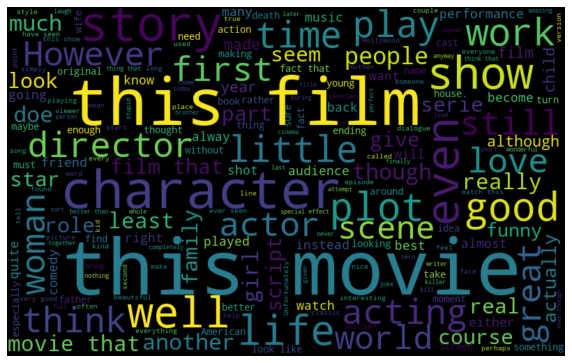

In [5]:
# Visualization of all words from the train data

all_words = ' '.join([text for text in train['tidy_review']])

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Different visualizations for different sentiments

As it was said before movies with label 0 were for reviews with less than a 5 rating, and movies with rate 1 were movies with more than 7 rating. Therefore, I thought it was important to plot the most frequent words of both sets to see if we can find some differences on them. In the 0-labeled data we can find words such as good and well being among the most frequent, however, in the 1-labeled data which corresponds to better reviews we can find words such as love and great among the most frequent ones, which leads us to believe that our training dataset is quite good.

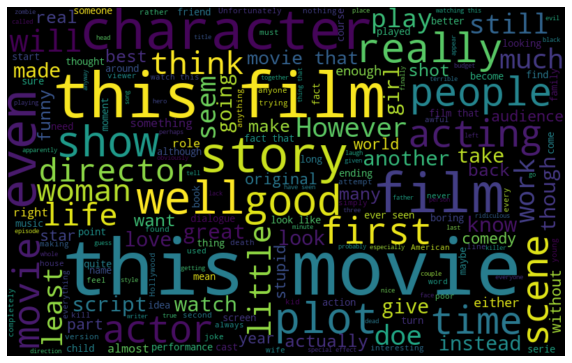

In [6]:
# From the train data with sentiment label equal to 0.

normal_words =' '.join([text for text in train['tidy_review'][train['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

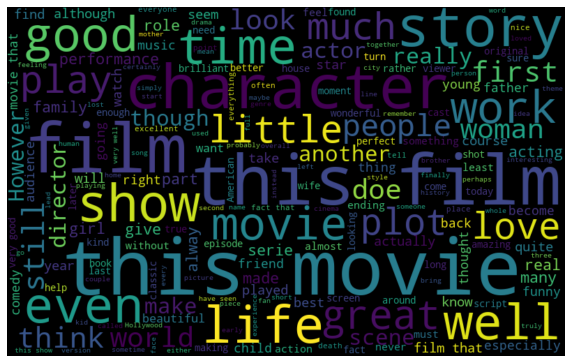

In [7]:
# From the train data with sentiment label equal to 1.

normal_words =' '.join([text for text in train['tidy_review'][train['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Extracting features from cleaned tweets

To extract features from the text we will use just one method the bag of words method, since I decided to go for different classifiers and evaluate their results, instead of training both models in just one classifier. However, the tfidf vectorizer method is also introduced. The bag of words method consist of converting the text into numerical features, since the data to train our model needs to be transformed into numbers. If we consider a corpus C, that is composed of a collection of texts of a number of D documents and N tokens (words), the size of the bag of words matrix will be given by D X N, where each row of the matrix contains the frequency of tokens in the document. We will create the bag of words matrix sing the CountVectorizer function of scikit-learn.

The other method, tf-idf vectorizer, it is different from the previous one in the sense that it does not focus in the occurence of a word in a single document but in the entire corpus. It works by assigning lower weights to the most frequent words, while it gives importance to words that are rare in the entire corpus, but appear in a considerable amount of documents.



In [8]:
# Train data

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow_train = bow_vectorizer.fit_transform(train['tidy_review'])

# Building model using bag of words : Sentiment analysis


To compare the different models that I have trained I have used crossvalidation and focused in the roc area under the curve metric (roc_auc). This is a probability curve and measures the spreadability of our data, and therefore it is able to tell us how much a model is able to distinguish between classes.

I have also calculated the f1-score just for the Logistic Regression Model since it is also a quite representative measure for classification problems, and it represents the weighted average of the precision and recall metrics. However, the AUC-ROC curve has a builtin hyperparamter when referring to cross-validation and therefore was easier to compare among models.

In [9]:
# F1-score Logistic regression models

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import f1_score

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow_train, train['sentiment'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 then 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score_bow =  f1_score(yvalid, prediction_int) # calculating f1 score

print("The f1 score for the bag of words method with a LogisticRegressor Classifier is: ", f1_score_bow)


C:\Users\Alex\FinalAnaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The f1 score for the bag of words method with a LogisticRegressor Classifier is:  0.8500670977186775


In [10]:
# AUC-ROC score for random forest model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc

X = bow_train

y = train["sentiment"]

random_forest_model = RandomForestClassifier()

split = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)

# 2 hyperparameters will be tuned --> n_estimators, min_samples_leaf
parameters = {"n_estimators": [20,50,100,200,300,400], "min_samples_leaf": [0.1, 0.12, 0.14, 0.16, 0.18]}

# Select the best hyperparameter value, based on NRMSE
random_forest_cv = GridSearchCV(random_forest_model, parameters, scoring = 'roc_auc', cv = split)

random_forest_cv.fit(X,y)

rf_final = RandomForestClassifier(n_estimators=random_forest_cv.best_params_["n_estimators"], min_samples_leaf=random_forest_cv.best_params_["min_samples_leaf"])

rf_final.fit(xtrain_bow, ytrain)

preds = rf_final.predict(xvalid_bow)

fpr, tpr, _ = roc_curve(yvalid, preds)
roc_auc_rf = auc(fpr, tpr)

print("The AUC-ROC score fot the random forest model is: ", roc_auc_rf)

The AUC-ROC score fot the random forest model is:  0.6514240572490129


In [11]:
# AUC-ROC score for the LogisticRegression model

X = bow_train

y = train["sentiment"]

lreg = LogisticRegression()

split = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)

parameters = {"C": [0.01, 0.1, 0.3, 0.5, 1.0, 10, 100]}

lreg_cv = GridSearchCV(lreg, parameters, scoring = 'roc_auc', cv = split)

lreg_cv.fit(X,y)

lreg_final = LogisticRegression(C=lreg_cv.best_params_["C"])

lreg_final.fit(xtrain_bow, ytrain) # training the model

prediction = lreg_final.predict(xvalid_bow) # predicting on the validation set
fpr, tpr, _ = roc_curve(yvalid, prediction)

roc_auc_lreg = auc(fpr, tpr)

print("The AUC-ROC score for the Logistic regression model is: ", roc_auc_lreg)

C:\Users\Alex\FinalAnaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Alex\FinalAnaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Alex\FinalAnaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Alex\FinalAnaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Alex\FinalAnaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

The AUC-ROC score for the Logistic regression model is:  0.8554464131046036


In [12]:
# AUC-ROC score for the GradientBoostingClassifier model

from sklearn.ensemble import GradientBoostingClassifier

split = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)

# Create a model which will be used with tuned hyperparameters.
gradient_boosting_model = GradientBoostingClassifier()

# 3 hyperparameters will be tuned --> n_estimators, min_samples_leaf, max_depth
parameters = {"n_estimators": [10,20,50], "min_samples_leaf": [0.1, 0.2, 0.3, 0.4], "max_depth":[2,4,6]}

# Select the best hyperparameter value, based on NRMSE
gradient_boosting_cv = GridSearchCV(gradient_boosting_model, parameters, scoring = 'roc_auc', cv = split)

gradient_boosting_cv.fit(X,y)

# Create a model with the optimal hyperparameters
gradient_boosting_final = GradientBoostingClassifier(n_estimators=gradient_boosting_cv.best_params_["n_estimators"], min_samples_leaf=gradient_boosting_cv.best_params_["min_samples_leaf"], max_depth=gradient_boosting_cv.best_params_["max_depth"])

gradient_boosting_final.fit(xtrain_bow, ytrain) # training the model

prediction = gradient_boosting_final.predict(xvalid_bow) # predicting on the validation set
fpr, tpr, _ = roc_curve(yvalid, prediction)

roc_auc_gb = auc(fpr, tpr)

print("The AUC-ROC score for the GradientBoostingClassifier model is: ", roc_auc_gb)


The AUC-ROC score for the GradientBoostingClassifier model is:  0.6805053150410927


In [14]:
models_performance = [('Random Forest Classifier', roc_auc_rf),
                      ('Gradient Boosting Classifier', roc_auc_gb),
                     ('Logistic Regression', roc_auc_lreg),
                     ]

models_performance_1 = sorted(models_performance, key = lambda x: x[1], reverse=True)

models_final_evaluation = pd.DataFrame(data = models_performance_1, columns=['Classification Model', 'CV AUC-ROC score'])
print(models_final_evaluation)

           Classification Model  CV AUC-ROC score
0           Logistic Regression          0.855446
1  Gradient Boosting Classifier          0.680505
2      Random Forest Classifier          0.651424


## Final conclusion

As it can be seen in the final dataframe, in order to preview the sentiment for new reviews the best model to use is the LogisticRegression one, since is the one giving the highest AUC-ROC score, and therefore is the one that distinguishes better among the different sentiments.